In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from scipy import stats

#Load the csv
df = pd.read_csv("properties_data_set_19_11_20H00.csv")

#Additional data cleaning and renaming
df = df[df['price'] >= 40000]
df = df[df['bedrooms'] <= 9]
df['house_index'] = range(1, len(df) + 1)

df['buildingState'] = df['buildingState'].replace({
    'AS_NEW': 1,
    'JUST_RENOVATED': 2,
    'GOOD': 3,
    'TO_RESTORE': 4,
    'TO_RENOVATE': 4,
    'TO_BE_DONE_UP':4
})
#print(df['buildingState'].nunique())
#print(df['buildingState'].unique())


df['province'] = df['province'].replace({'flemish_brabant_extended': 'flemish_brabant', 'hainaut_extended': 'hainaut_province'})
df['province'] = df['province'].replace({'flemish_brabant': 'Flemish Brabant', 'hainaut_province': 'Hainaut', 'antwerp_province': 'Antwerp', 'brussels_capital': 'Brussels', 
                                         'limburg_province': 'Limburg', 'liège_province': 'Liège', 'luxembourg_province': 'Luxembourg', 'namur_province': 'Namur', 
                                         'walloon_brabant': 'Walloon Brabant', 'west_flanders': 'West Flanders','east_flanders': 'East Flanders'})
#print(df['province'].nunique())
#print(df['province'].unique())


#Number of rows and columns and useless columns dropped
rows, columns = df.shape
table = PrettyTable()
table.field_names = ["Axis", "Count"]
table.add_row(["Number of Rows", rows])
table.add_row(["Number of Columns", columns])
print(table)
df = df.drop(['street', 'number', 'box', 'landSurface', 'fireplaceCount'], axis=1)

#NaN counts before changes
nan_count = df.isna().sum()
total_rows = len(df)
table = PrettyTable()
table.field_names = ["Column Name", "NaN Count", "NaN Percentage"]
for column_name in nan_count.index:
    nan_percentage = (nan_count[column_name] / total_rows) * 100
    table.add_row([column_name, nan_count[column_name], f"{nan_percentage:.2f}%"])
print(table)

#Cleaning
columns_to_replace = ['terraceSurface']
df[columns_to_replace] = df[columns_to_replace].fillna(0)
df = df.dropna(subset=['livingArea'])
df = df.drop(['property_subtype', 'typeOfSale', 'terrace', 'garden'], axis=1)

#Summary after changes
rows, columns = df.shape
table = PrettyTable()
table.field_names = ["Axis", "Count"]
table.add_row(["Number of Rows", rows])
table.add_row(["Number of Columns", columns])
print(table)

nan_count = df.isna().sum()
total_rows = len(df)
table = PrettyTable()
table.field_names = ["Column Name", "NaN Count", "NaN Percentage"]
for column_name in nan_count.index:
    nan_percentage = (nan_count[column_name] / total_rows) * 100
    table.add_row([column_name, nan_count[column_name], f"{nan_percentage:.2f}%"])
print(table)


+-------------------+-------+
|        Axis       | Count |
+-------------------+-------+
|   Number of Rows  | 16250 |
| Number of Columns |   27  |
+-------------------+-------+
+------------------+-----------+----------------+
|   Column Name    | NaN Count | NaN Percentage |
+------------------+-----------+----------------+
|   house_index    |     0     |     0.00%      |
|       url        |     0     |     0.00%      |
|     bedrooms     |     0     |     0.00%      |
|  property_type   |     0     |     0.00%      |
| property_subtype |     0     |     0.00%      |
|     locality     |     0     |     0.00%      |
|   postal_code    |     0     |     0.00%      |
|     kitchen      |     0     |     0.00%      |
|     facades      |    4573   |     28.14%     |
|      price       |     0     |     0.00%      |
|    furnished     |     0     |     0.00%      |
|     terrace      |     0     |     0.00%      |
|  terraceSurface  |    4816   |     29.64%     |
|    fireplace     |

C:\Users\Hashira\AppData\Local\Temp\ipykernel_131652\2598554889.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['buildingState'] = df['buildingState'].replace({


In [2]:
#New value : price per square meter
df['price_per_sqm'] = (df['price'] / df['livingArea']).round(2)

# Group by locality
table_data = df.groupby('province').agg({
    'price': ['mean', 'median', 'std'],
    'livingArea': ['mean', 'median', 'std'],
    'price_per_sqm': ['mean', 'median', 'std']
}).round(2)

def format_number(number):
    return "{:,.0f}".format(number).replace(",", ".")

# 'price'
price_table = PrettyTable()
price_table.field_names = ["Province"] + [f"price_{stat}" for stat in ['mean', 'median', 'std']]

for index, row in table_data['price'].iterrows():
    price_table.add_row([index] + [format_number(value) for value in row.tolist()])

print("Price Statistics")
print(price_table)

# 'livingArea'
living_area_table = PrettyTable()
living_area_table.field_names = ["Province"] + [f"livingArea_{stat}" for stat in ['mean', 'median', 'std']]

for index, row in table_data['livingArea'].iterrows():
    living_area_table.add_row([index] + [format_number(value) for value in row.tolist()])

print("Living Area Statistics")
print(living_area_table)

# 'price_per_sqm'
price_per_sqm_table = PrettyTable()
price_per_sqm_table.field_names = ["Province"] + [f"price_per_sqm_{stat}" for stat in ['mean', 'median', 'std']]

for index, row in table_data['price_per_sqm'].iterrows():
    price_per_sqm_table.add_row([index] + [format_number(value) for value in row.tolist()])

print("Price per Square Meter Statistics")
print(price_per_sqm_table)


Price Statistics
+-----------------+------------+--------------+-----------+
|     Province    | price_mean | price_median | price_std |
+-----------------+------------+--------------+-----------+
|     Antwerp     |  465.190   |   355.000    |  426.825  |
|     Brussels    |  465.361   |   350.000    |  385.709  |
|  East Flanders  |  422.976   |   349.700    |  299.595  |
| Flemish Brabant |  487.466   |   399.000    |  300.735  |
|     Hainaut     |  312.848   |   279.000    |  186.269  |
|     Limburg     |  423.370   |   335.000    |  290.338  |
|      Liège      |  313.125   |   265.000    |  226.766  |
|    Luxembourg   |  379.179   |   320.000    |  236.841  |
|      Namur      |  299.825   |   290.000    |  132.851  |
| Walloon Brabant |  515.528   |   425.000    |  393.457  |
|  West Flanders  |  610.993   |   369.000    |  735.851  |
+-----------------+------------+--------------+-----------+
Living Area Statistics
+-----------------+-----------------+-------------------+---

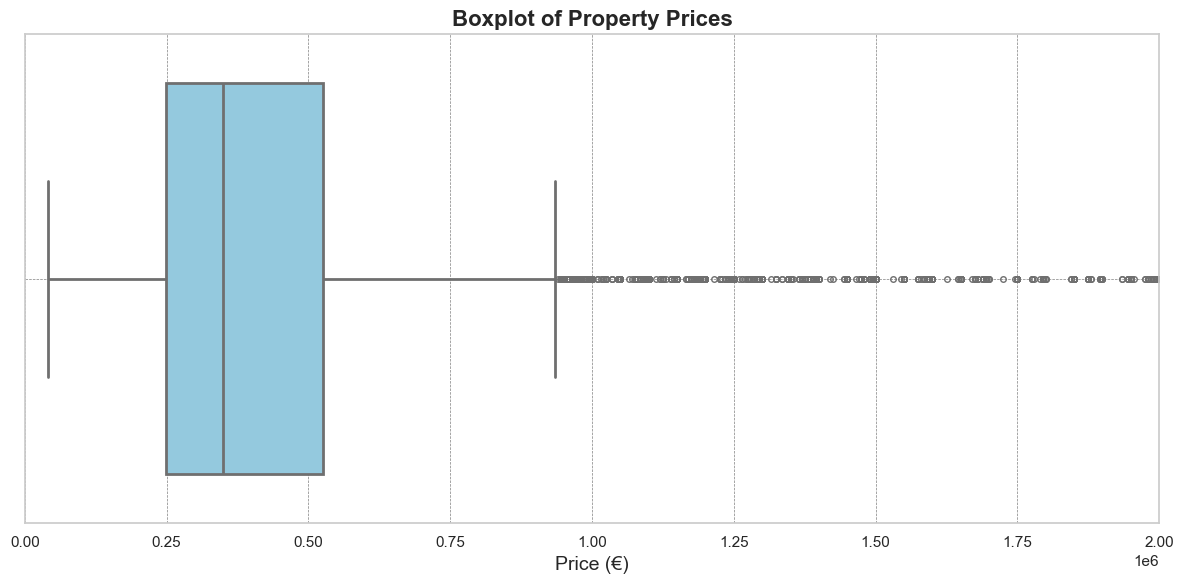

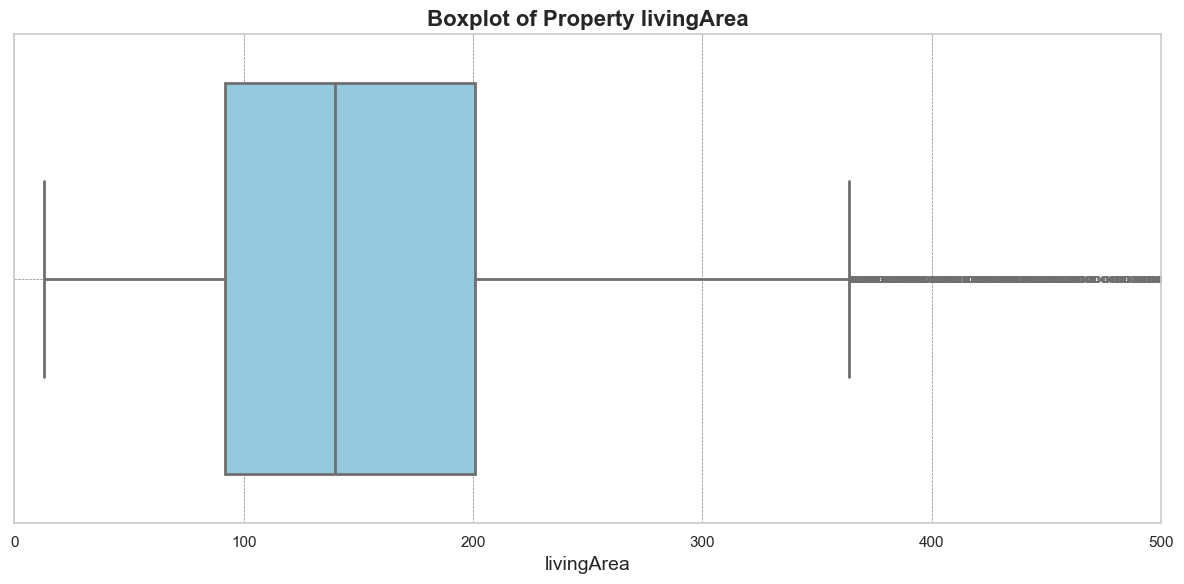

In [5]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['price'], color="skyblue", fliersize=4, linewidth=2)
plt.title('Boxplot of Property Prices', fontsize=16, fontweight='bold')
plt.xlabel('Price (€)', fontsize=14)
plt.xlim(0, 2_000_000)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['livingArea'], color="skyblue", fliersize=4, linewidth=2)
plt.title('Boxplot of Property livingArea', fontsize=16, fontweight='bold')
plt.xlabel('livingArea', fontsize=14)
plt.xlim(0, 500)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [6]:
print(df.shape)

#Interquartile Range (IQR) method for excluding outliers based on livingArea
q1 = df["livingArea"].quantile(0.25)
q3 = df["livingArea"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

count_smaller_than_q1 = (df['livingArea'] < lower_bound).sum()
count_bigger_than_q3 = (df['livingArea'] > upper_bound).sum()
print(f'{count_smaller_than_q1} smaller than {lower_bound}')
print(f'{count_bigger_than_q3} bigger than {upper_bound}')

# sns.boxplot(x=df['livingArea'])
# plt.show()

# df = df[(df["livingArea"] >= lower_bound) & (df["livingArea"] <= upper_bound)]
# print(df.shape)

#Interquartile Range (IQR) method for excluding outliers based on price
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

count_smaller_than_q1 = (df['price'] < lower_bound).sum()
count_bigger_than_q3 = (df['price'] > upper_bound).sum()
print(f'{count_smaller_than_q1} smaller than {lower_bound}')
print(f'{count_bigger_than_q3} bigger than {upper_bound}')

# sns.boxplot(x=df['price'])
# plt.show()

# df = df[(df["price"] >= lower_bound) & (df["price"] <= upper_bound)]
# print(df.shape)

(15323, 19)
0 smaller than -71.5
843 bigger than 364.5
0 smaller than -163750.0
1205 bigger than 938250.0


In [7]:
z_scores = stats.zscore(df['livingArea'])
original_count = len(df)
df = df[abs(z_scores) < 3]
filtered_count = len(df)
removed_count = original_count - filtered_count

print(f"Original number of rows: {original_count}")
print(f"Filtered number of rows: {filtered_count}")
print(f"Number of rows removed with price: {removed_count}")

z_scores = stats.zscore(df['price'])
original_count = len(df)
df = df[abs(z_scores) < 3]
filtered_count = len(df)
removed_count = original_count - filtered_count

print(f"Original number of rows: {original_count}")
print(f"Filtered number of rows: {filtered_count}")
print(f"Number of rows removed with livingArea: {removed_count}")

Original number of rows: 15323
Filtered number of rows: 15124
Number of rows removed with price: 199
Original number of rows: 15124
Filtered number of rows: 14869
Number of rows removed with livingArea: 255


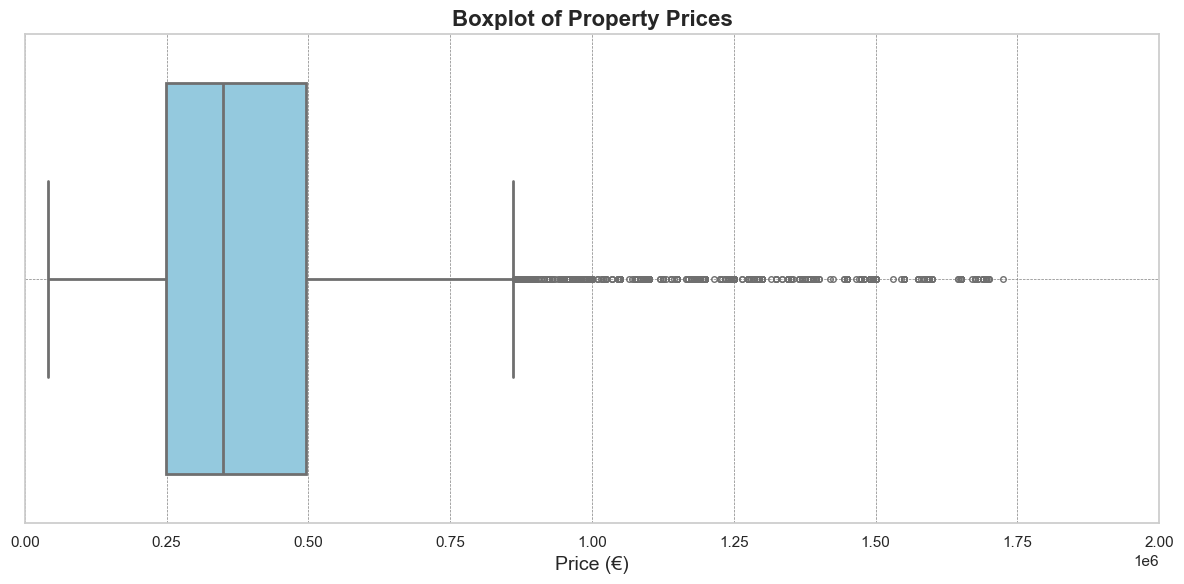

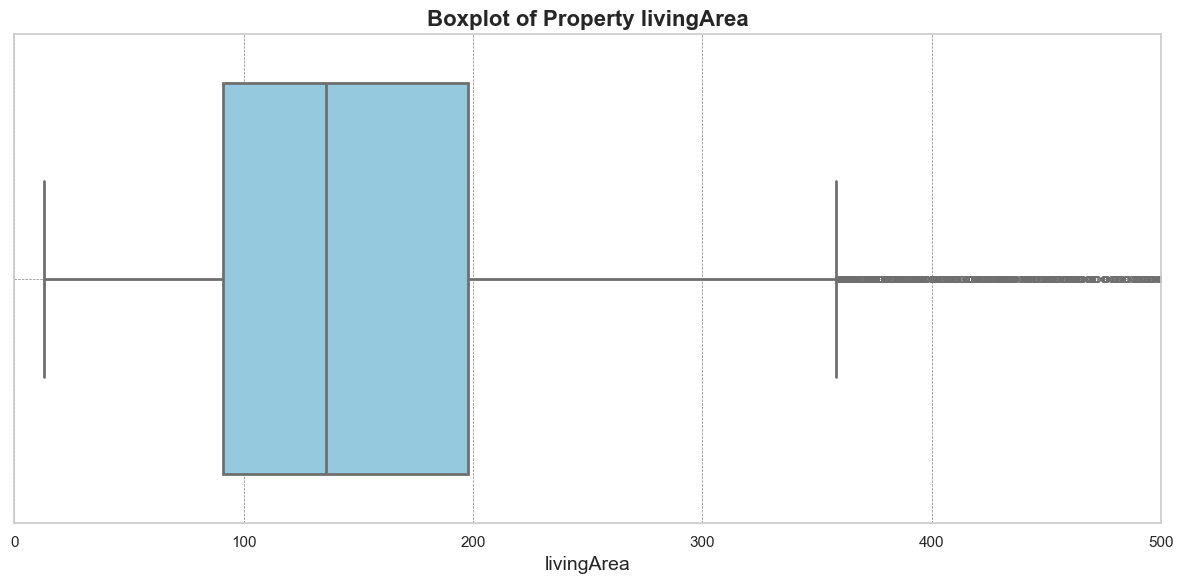

In [8]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['price'], color="skyblue", fliersize=4, linewidth=2)
plt.title('Boxplot of Property Prices', fontsize=16, fontweight='bold')
plt.xlabel('Price (€)', fontsize=14)
plt.xlim(0, 2_000_000)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['livingArea'], color="skyblue", fliersize=4, linewidth=2)
plt.title('Boxplot of Property livingArea', fontsize=16, fontweight='bold')
plt.xlabel('livingArea', fontsize=14)
plt.xlim(0, 500)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [9]:
# Group by locality after dealing with outliers
table_data = df.groupby('province').agg({
    'price': ['mean', 'median', 'std'],
    'livingArea': ['mean', 'median', 'std'],
    'price_per_sqm': ['mean', 'median', 'std']
}).round(2)

def format_number(number):
    return "{:,.0f}".format(number).replace(",", ".")

# 'price'
price_table = PrettyTable()
price_table.field_names = ["Province"] + [f"price_{stat}" for stat in ['mean', 'median', 'std']]

for index, row in table_data['price'].iterrows():
    price_table.add_row([index] + [format_number(value) for value in row.tolist()])

print("Price Statistics")
print(price_table)

# 'livingArea'
living_area_table = PrettyTable()
living_area_table.field_names = ["Province"] + [f"livingArea_{stat}" for stat in ['mean', 'median', 'std']]

for index, row in table_data['livingArea'].iterrows():
    living_area_table.add_row([index] + [format_number(value) for value in row.tolist()])

print("Living Area Statistics")
print(living_area_table)

# 'price_per_sqm'
price_per_sqm_table = PrettyTable()
price_per_sqm_table.field_names = ["Province"] + [f"price_per_sqm_{stat}" for stat in ['mean', 'median', 'std']]

for index, row in table_data['price_per_sqm'].iterrows():
    price_per_sqm_table.add_row([index] + [format_number(value) for value in row.tolist()])

print("Price per Square Meter Statistics")
print(price_per_sqm_table)

Price Statistics
+-----------------+------------+--------------+-----------+
|     Province    | price_mean | price_median | price_std |
+-----------------+------------+--------------+-----------+
|     Antwerp     |  420.248   |   349.000    |  252.092  |
|     Brussels    |  436.341   |   349.000    |  273.890  |
|  East Flanders  |  400.176   |   349.000    |  214.831  |
| Flemish Brabant |  467.194   |   399.000    |  247.620  |
|     Hainaut     |  307.290   |   275.000    |  178.152  |
|     Limburg     |  397.607   |   329.000    |  235.981  |
|      Liège      |  302.304   |   264.750    |  167.410  |
|    Luxembourg   |  372.139   |   320.000    |  220.129  |
|      Namur      |  299.467   |   290.000    |  133.045  |
| Walloon Brabant |  459.708   |   417.000    |  220.350  |
|  West Flanders  |  462.677   |   349.000    |  334.263  |
+-----------------+------------+--------------+-----------+
Living Area Statistics
+-----------------+-----------------+-------------------+---

In [106]:
# Step 1: Calculate standard deviation and range per province
province_stats = df.groupby('province')['price'].agg(
    std_price='std',
    price_range=lambda x: x.max() - x.min()
).reset_index()

# Step 2: Create PrettyTable
table = PrettyTable()
table.field_names = ["Province", "Standard Deviation", "Price Range"]

# Add data rows
for index, row in province_stats.iterrows():
    table.add_row([row['province'], round(row['std_price'], 2), round(row['price_range'], 2)])

# Print the table
print(table)

+-----------------+--------------------+-------------+
|     Province    | Standard Deviation | Price Range |
+-----------------+--------------------+-------------+
|     Antwerp     |     357355.47      |  3935000.0  |
|     Brussels    |     325228.79      |  3040000.0  |
|  East Flanders  |      289689.7      |  3775000.0  |
| Flemish Brabant |     300734.82      |  2930000.0  |
|     Hainaut     |     186269.25      |  1430500.0  |
|     Limburg     |     290338.18      |  2384600.0  |
|      Liège      |     226765.88      |  3910000.0  |
|    Luxembourg   |     236841.18      |  1694000.0  |
|      Namur      |     132850.69      |   705000.0  |
| Walloon Brabant |     393456.67      |  3635000.0  |
|  West Flanders  |     576126.96      |  3950000.0  |
+-----------------+--------------------+-------------+


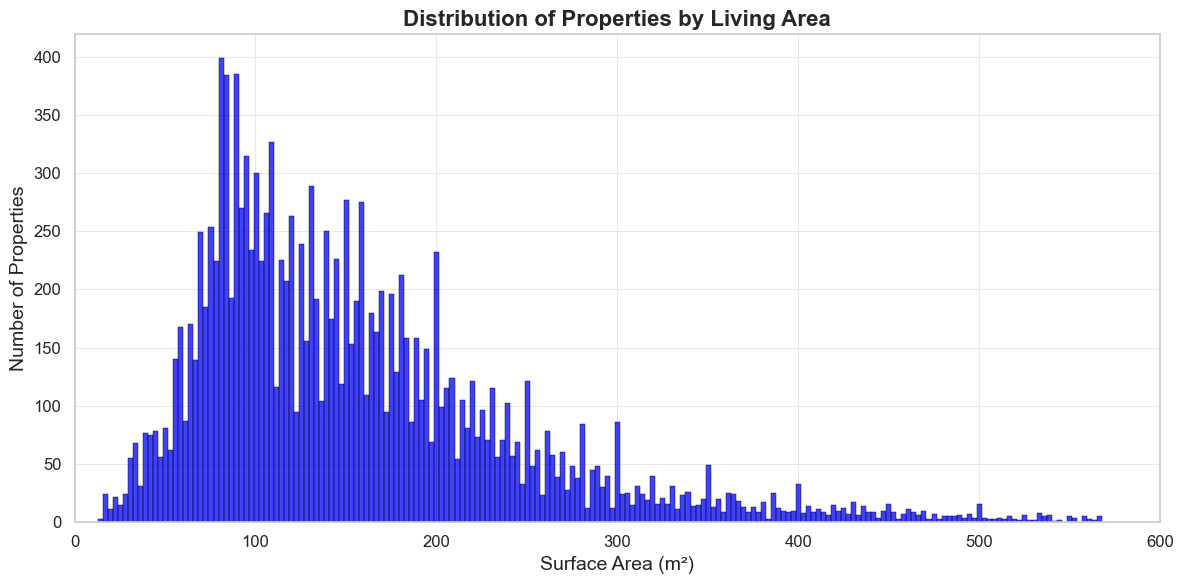

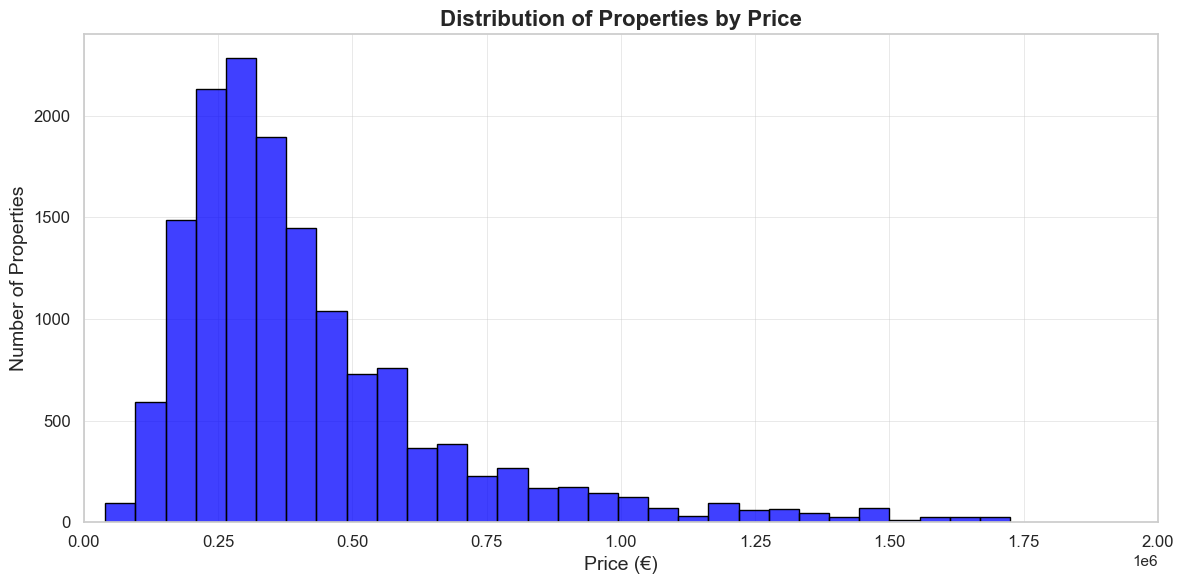

In [44]:
# Distribution of Properties by Living Area
plt.figure(figsize=(12, 6))
sns.histplot(df['livingArea'], bins=200, color='blue', edgecolor='black', kde=False)
plt.xlim(0, 600)
plt.title('Distribution of Properties by Living Area', fontsize=16, fontweight='bold')
plt.xlabel('Surface Area (m²)', fontsize=14)
plt.ylabel('Number of Properties', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()

# Distribution of Properties by Price
plt.figure(figsize=(12, 6))
sns.histplot(df['price'].dropna(), bins=30, color='blue', edgecolor='black', kde=False)
plt.xlim(0, 2000000)
plt.title('Distribution of Properties by Price', fontsize=16, fontweight='bold')
plt.xlabel('Price (€)', fontsize=14)
plt.ylabel('Number of Properties', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()



In [33]:
# Group by locality
locality_stats = df.groupby('province').agg(
    mean_price=('price', 'mean'),
    median_price=('price', 'median'),
    mean_price_per_sqm=('price_per_sqm', 'mean'),
    median_price_per_sqm=('price_per_sqm', 'median')
).reset_index()

# Most/Least expensive by province
most_expensive_province_median = locality_stats.sort_values(by='median_price', ascending=False).head(11)
most_expensive_province_mean = locality_stats.sort_values(by='mean_price', ascending=False).head(11)
most_expensive_province_sqm_median = locality_stats.sort_values(by='median_price_per_sqm', ascending=False).head(11)


# Print results
print("Most to least expensive provinces by median")
print(most_expensive_province_median)

print("Most to least expensive provinces by mean")
print(most_expensive_province_mean)

Most to least expensive provinces by median
           province     mean_price  median_price  mean_price_per_sqm  \
9   Walloon Brabant  459707.684971      417000.0         2890.072052   
3   Flemish Brabant  467193.706306      399000.0         2795.011832   
0           Antwerp  420248.153679      349000.0         2701.601689   
2     East Flanders  400175.922312      349000.0         2547.775935   
1          Brussels  436340.853892      349000.0         3577.551946   
10    West Flanders  462676.995960      349000.0         4299.998689   
5           Limburg  397606.768559      329000.0         2174.686550   
7        Luxembourg  372139.195402      320000.0         2313.977931   
8             Namur  299466.660633      290000.0         2180.721855   
4           Hainaut  307290.129199      275000.0         1848.704005   
6             Liège  302303.606640      264750.0         2073.415121   

    median_price_per_sqm  
9               2802.220  
3               2586.960  
0         

C:\Users\Hashira\AppData\Local\Temp\ipykernel_131652\63463975.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_expensive_province_median, x='province', y='median_price', palette='coolwarm')


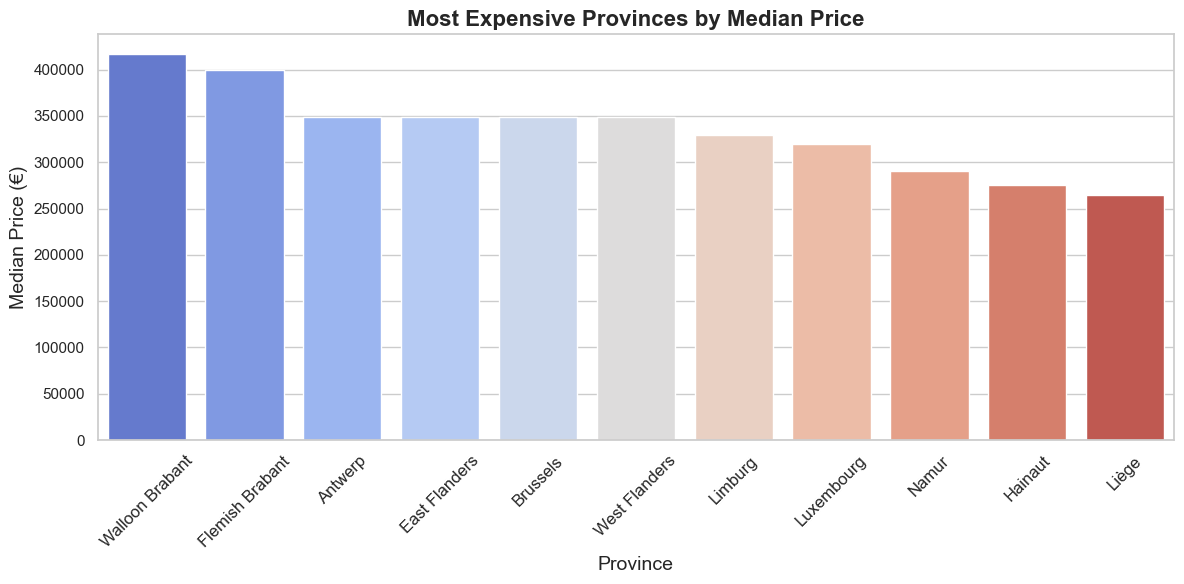

C:\Users\Hashira\AppData\Local\Temp\ipykernel_131652\63463975.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_expensive_province_mean, x='province', y='mean_price', palette='coolwarm')


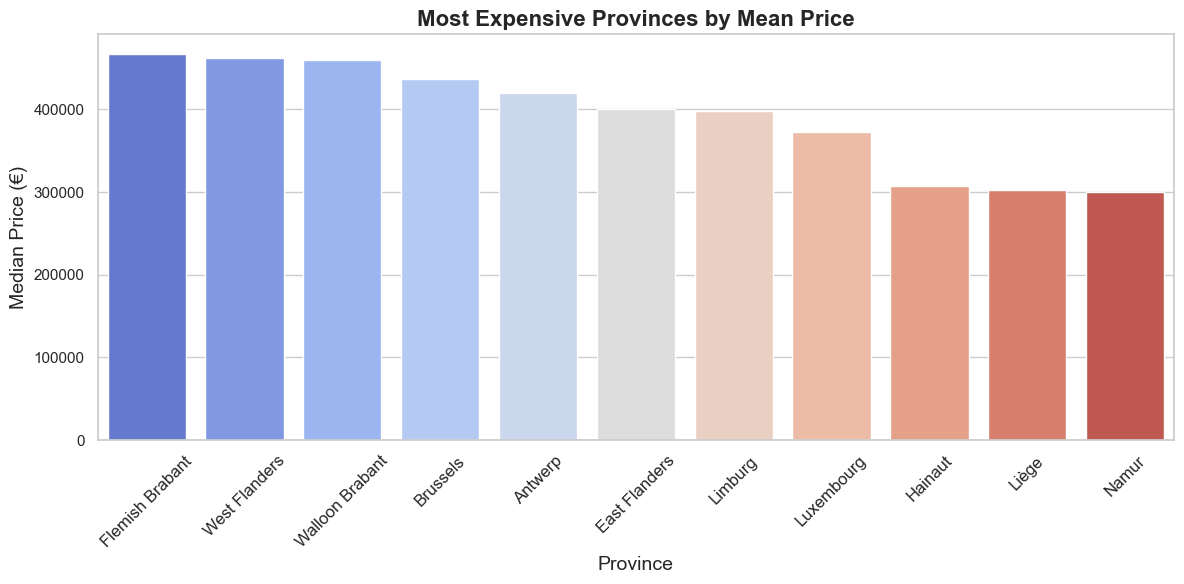

C:\Users\Hashira\AppData\Local\Temp\ipykernel_131652\63463975.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


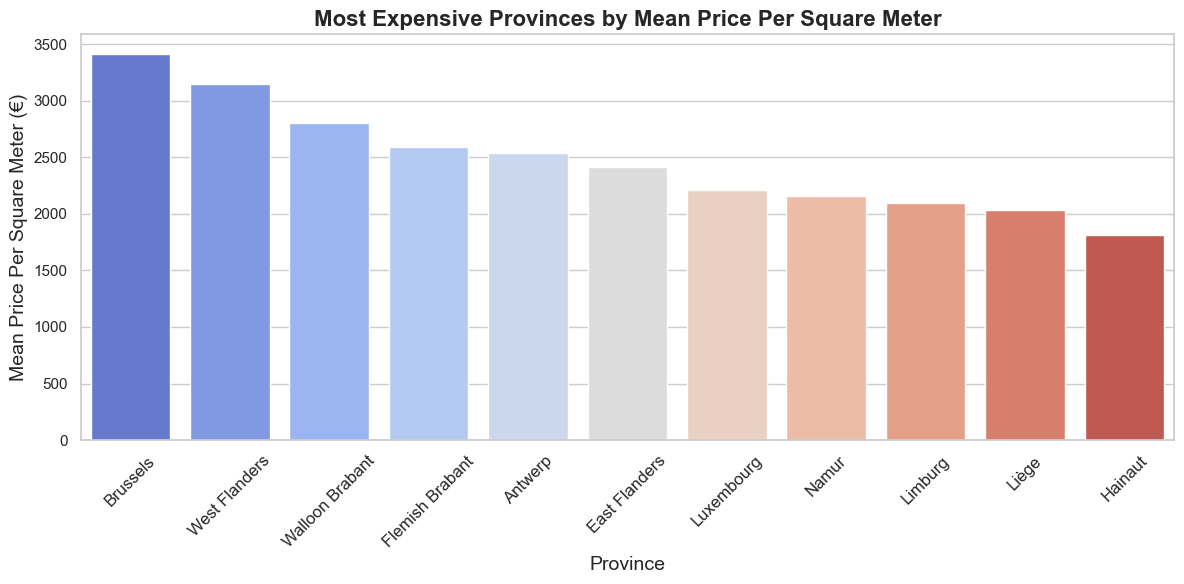

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Most expensive provinces by median
plt.figure(figsize=(12, 6))
sns.barplot(data=most_expensive_province_median, x='province', y='median_price', palette='coolwarm')
plt.title('Most Expensive Provinces by Median Price', fontsize=16, fontweight='bold')
plt.xlabel('Province', fontsize=14)
plt.ylabel('Median Price (€)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

# Most expensive provinces by mean
plt.figure(figsize=(12, 6))
sns.barplot(data=most_expensive_province_mean, x='province', y='mean_price', palette='coolwarm')
plt.title('Most Expensive Provinces by Mean Price', fontsize=16, fontweight='bold')
plt.xlabel('Province', fontsize=14)
plt.ylabel('Median Price (€)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

# Most expensive provinces by median price sqm
plt.figure(figsize=(12, 6))
sns.barplot(
    data=most_expensive_province_sqm_median,  # Assuming this contains 'mean_price_per_sqm' column
    x='province',
    y='median_price_per_sqm',
    palette='coolwarm'
)
plt.title('Most Expensive Provinces by Mean Price Per Square Meter', fontsize=16, fontweight='bold')
plt.xlabel('Province', fontsize=14)
plt.ylabel('Mean Price Per Square Meter (€)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\Hashira\AppData\Local\Temp\ipykernel_131652\2683617606.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_expensive_homes, x='province', y='median_price', palette='coolwarm')


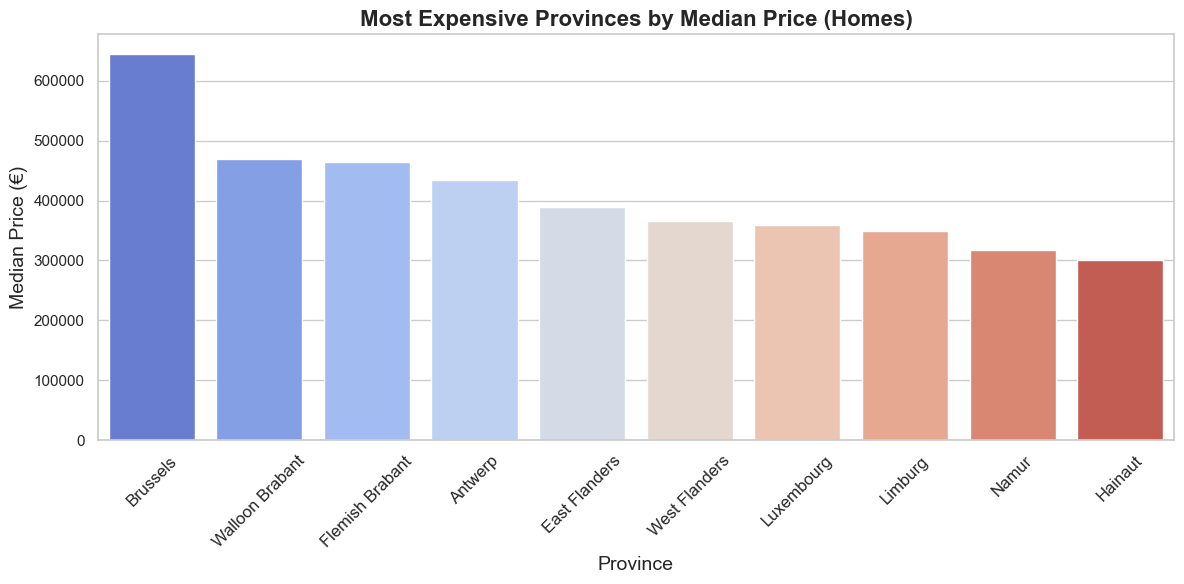

C:\Users\Hashira\AppData\Local\Temp\ipykernel_131652\2683617606.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_expensive_homes_sqm, x='province', y='median_price_per_sqm', palette='coolwarm')


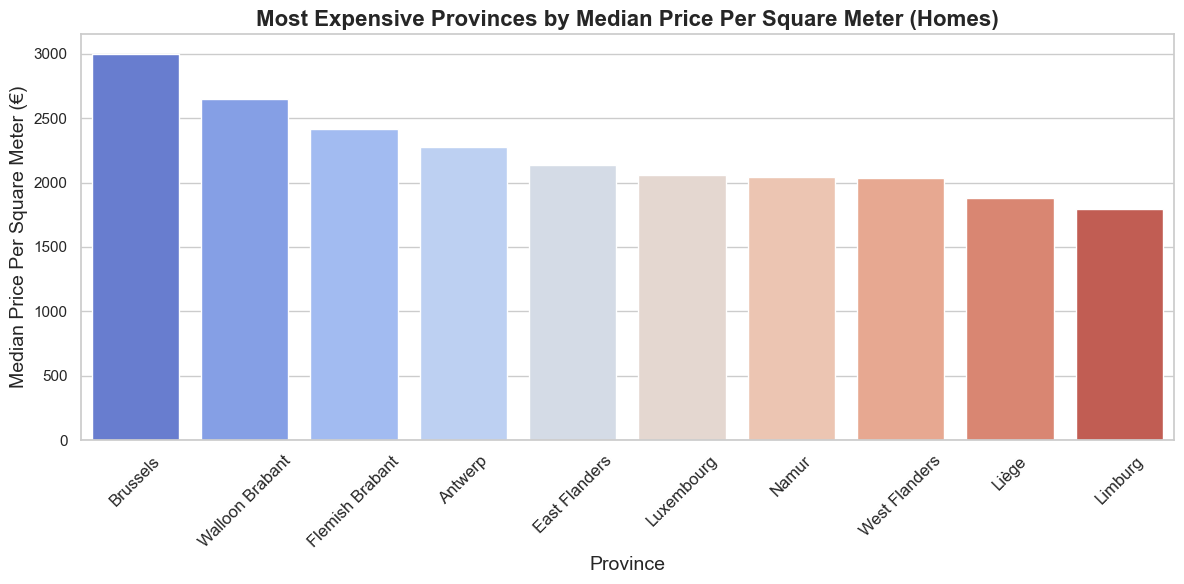

C:\Users\Hashira\AppData\Local\Temp\ipykernel_131652\2683617606.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_expensive_apartments, x='province', y='median_price', palette='coolwarm')


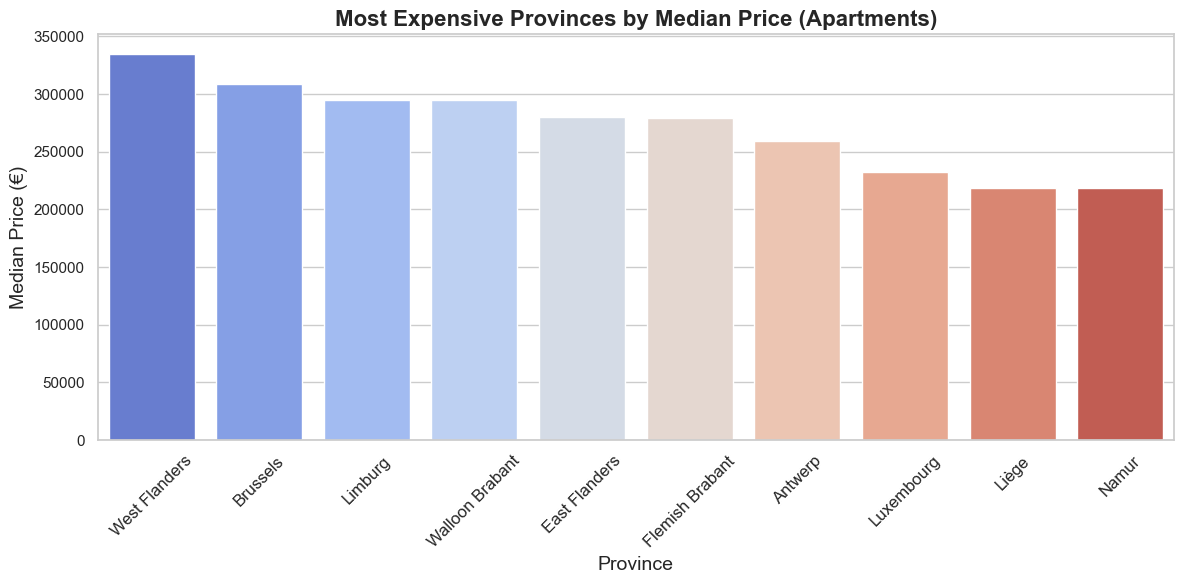

C:\Users\Hashira\AppData\Local\Temp\ipykernel_131652\2683617606.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_expensive_apartments_sqm, x='province', y='median_price_per_sqm', palette='coolwarm')


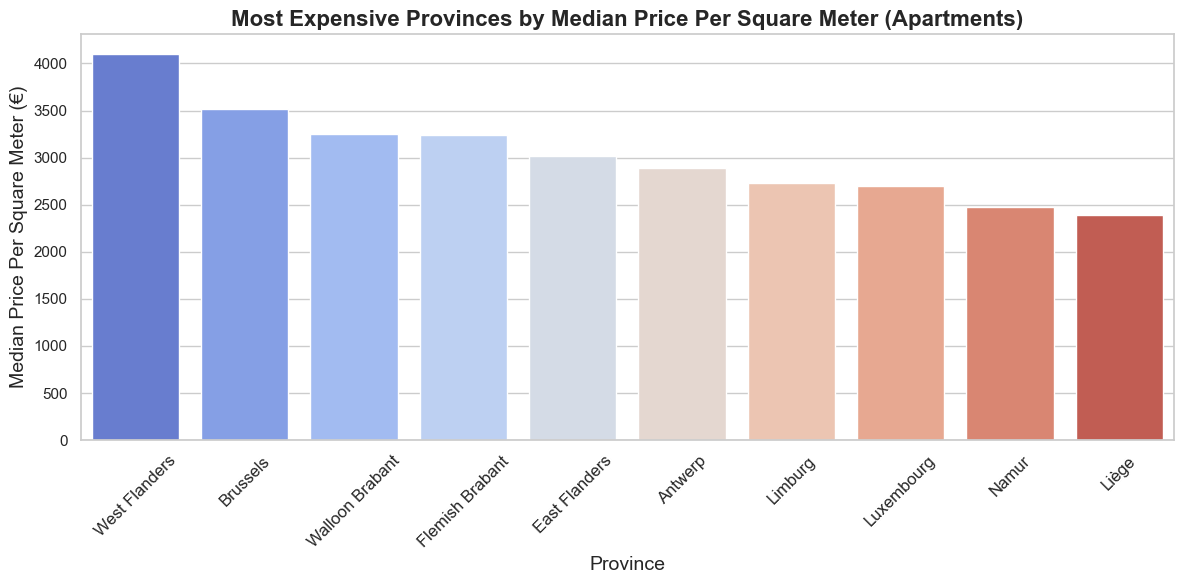

In [39]:
#Same analysis but for homes and apartments separtly
homes_df = df[df['property_type'] == 'HOUSE']
apartments_df = df[df['property_type'] == 'APARTMENT']

# Group by province for homes
homes_stats = homes_df.groupby('province').agg(
    median_price=('price', 'median'),
    median_price_per_sqm=('price_per_sqm', 'median')
).reset_index()

# Group by province for apartments
apartments_stats = apartments_df.groupby('province').agg(
    median_price=('price', 'median'),
    median_price_per_sqm=('price_per_sqm', 'median')
).reset_index()

# Most expensive provinces for homes and apartments
most_expensive_homes = homes_stats.sort_values(by='median_price', ascending=False).head(10)
most_expensive_homes_sqm = homes_stats.sort_values(by='median_price_per_sqm', ascending=False).head(10)

most_expensive_apartments = apartments_stats.sort_values(by='median_price', ascending=False).head(10)
most_expensive_apartments_sqm = apartments_stats.sort_values(by='median_price_per_sqm', ascending=False).head(10)

# Visualization for homes (median price)
plt.figure(figsize=(12, 6))
sns.barplot(data=most_expensive_homes, x='province', y='median_price', palette='coolwarm')
plt.title('Most Expensive Provinces by Median Price (Homes)', fontsize=16, fontweight='bold')
plt.xlabel('Province', fontsize=14)
plt.ylabel('Median Price (€)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

# Visualization for homes (median price per sqm)
plt.figure(figsize=(12, 6))
sns.barplot(data=most_expensive_homes_sqm, x='province', y='median_price_per_sqm', palette='coolwarm')
plt.title('Most Expensive Provinces by Median Price Per Square Meter (Homes)', fontsize=16, fontweight='bold')
plt.xlabel('Province', fontsize=14)
plt.ylabel('Median Price Per Square Meter (€)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

# Visualization for apartments (median price)
plt.figure(figsize=(12, 6))
sns.barplot(data=most_expensive_apartments, x='province', y='median_price', palette='coolwarm')
plt.title('Most Expensive Provinces by Median Price (Apartments)', fontsize=16, fontweight='bold')
plt.xlabel('Province', fontsize=14)
plt.ylabel('Median Price (€)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

# Visualization for apartments (median price per sqm)
plt.figure(figsize=(12, 6))
sns.barplot(data=most_expensive_apartments_sqm, x='province', y='median_price_per_sqm', palette='coolwarm')
plt.title('Most Expensive Provinces by Median Price Per Square Meter (Apartments)', fontsize=16, fontweight='bold')
plt.xlabel('Province', fontsize=14)
plt.ylabel('Median Price Per Square Meter (€)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\Hashira\AppData\Local\Temp\ipykernel_131652\840778532.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_expensive_homes_mean, x='province', y='mean_price', palette='coolwarm')


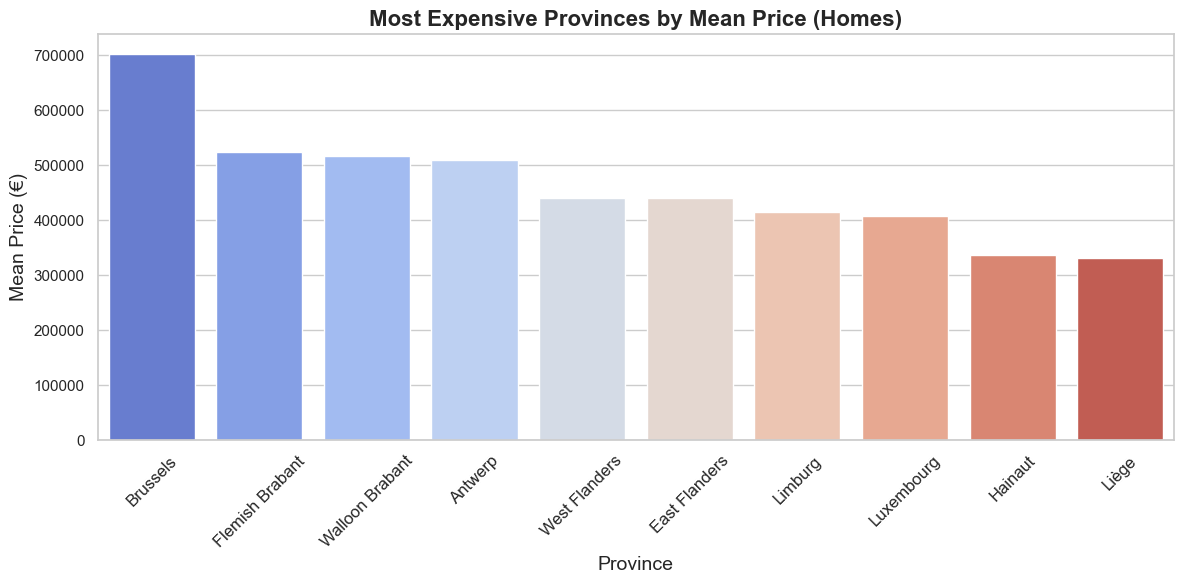

C:\Users\Hashira\AppData\Local\Temp\ipykernel_131652\840778532.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_expensive_homes_sqm_mean, x='province', y='mean_price_per_sqm', palette='coolwarm')


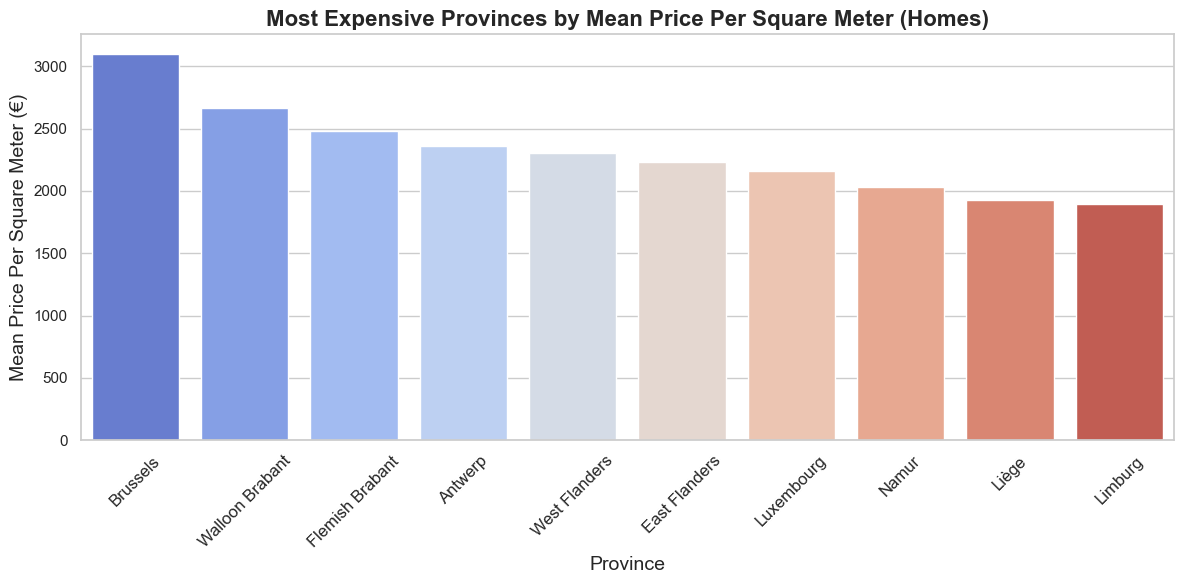

C:\Users\Hashira\AppData\Local\Temp\ipykernel_131652\840778532.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_expensive_apartments_mean, x='province', y='mean_price', palette='coolwarm')


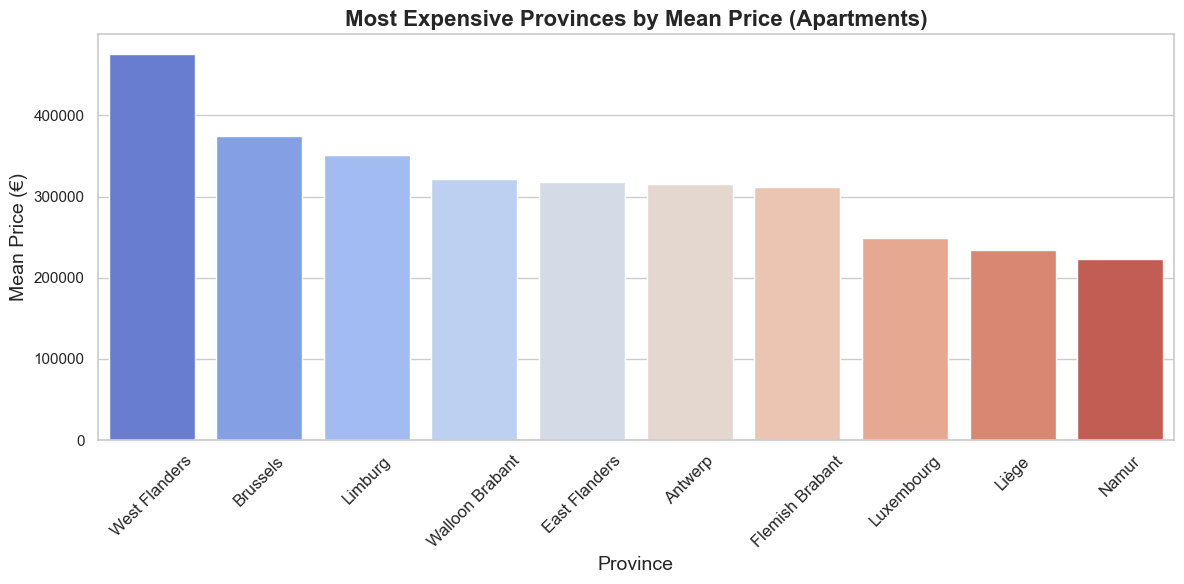

C:\Users\Hashira\AppData\Local\Temp\ipykernel_131652\840778532.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_expensive_apartments_sqm_mean, x='province', y='mean_price_per_sqm', palette='coolwarm')


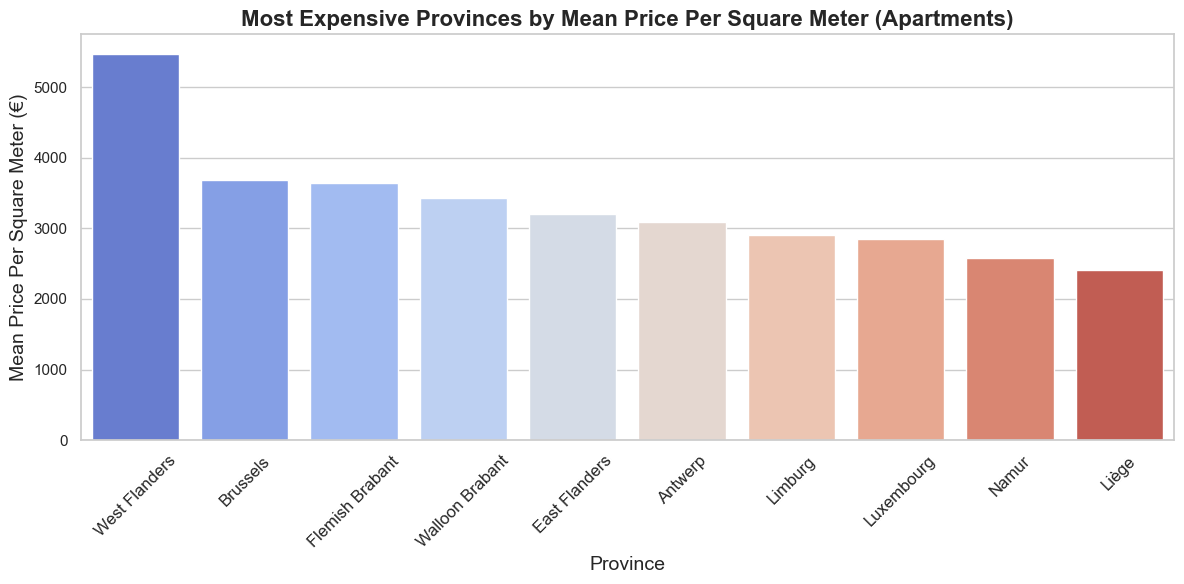

In [40]:
# Group by province for homes
homes_stats_mean = homes_df.groupby('province').agg(
    mean_price=('price', 'mean'),
    mean_price_per_sqm=('price_per_sqm', 'mean')
).reset_index()

# Group by province for apartments
apartments_stats_mean = apartments_df.groupby('province').agg(
    mean_price=('price', 'mean'),
    mean_price_per_sqm=('price_per_sqm', 'mean')
).reset_index()

# Most expensive provinces for homes and apartments
most_expensive_homes_mean = homes_stats_mean.sort_values(by='mean_price', ascending=False).head(10)
most_expensive_homes_sqm_mean = homes_stats_mean.sort_values(by='mean_price_per_sqm', ascending=False).head(10)

most_expensive_apartments_mean = apartments_stats_mean.sort_values(by='mean_price', ascending=False).head(10)
most_expensive_apartments_sqm_mean = apartments_stats_mean.sort_values(by='mean_price_per_sqm', ascending=False).head(10)

# Visualization for homes
plt.figure(figsize=(12, 6))
sns.barplot(data=most_expensive_homes_mean, x='province', y='mean_price', palette='coolwarm')
plt.title('Most Expensive Provinces by Mean Price (Homes)', fontsize=16, fontweight='bold')
plt.xlabel('Province', fontsize=14)
plt.ylabel('Mean Price (€)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

# Visualization for homes
plt.figure(figsize=(12, 6))
sns.barplot(data=most_expensive_homes_sqm_mean, x='province', y='mean_price_per_sqm', palette='coolwarm')
plt.title('Most Expensive Provinces by Mean Price Per Square Meter (Homes)', fontsize=16, fontweight='bold')
plt.xlabel('Province', fontsize=14)
plt.ylabel('Mean Price Per Square Meter (€)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

# Visualization for apartments
plt.figure(figsize=(12, 6))
sns.barplot(data=most_expensive_apartments_mean, x='province', y='mean_price', palette='coolwarm')
plt.title('Most Expensive Provinces by Mean Price (Apartments)', fontsize=16, fontweight='bold')
plt.xlabel('Province', fontsize=14)
plt.ylabel('Mean Price (€)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

# Visualization for apartments
plt.figure(figsize=(12, 6))
sns.barplot(data=most_expensive_apartments_sqm_mean, x='province', y='mean_price_per_sqm', palette='coolwarm')
plt.title('Most Expensive Provinces by Mean Price Per Square Meter (Apartments)', fontsize=16, fontweight='bold')
plt.xlabel('Province', fontsize=14)
plt.ylabel('Mean Price Per Square Meter (€)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


In [47]:
# Assign region column to the original DataFrame
wallonia_provinces = ['Liège', 'Hainaut', 'Namur', 'Walloon Brabant', 'Luxembourg']
flanders_provinces = ['East Flanders', 'West Flanders', 'Flemish Brabantt', 'Antwerp', 'Limburg']
brussels_province = ['Brussels']


df['province'] = df['province'].replace({'flemish_brabant_extended': 'flemish_brabant', 'hainaut_extended': 'hainaut_province'})
df['province'] = df['province'].replace({'flemish_brabant': 'Flemish Brabant', 'hainaut_province': 'Hainaut', 'antwerp_province': 'Antwerp', 'brussels_capital': 'Brussels', 
                                         'limburg_province': 'Limburg', 'liège_province': 'Liège', 'luxembourg_province': 'Luxembourg', 'namur_province': 'Namur', 
                                         'walloon_brabant': 'Walloon Brabant', 'west_flanders': 'West Flanders','east_flanders': 'East Flanders'})
#print(df['province'].nunique())
#print(df['province'].unique())

df['region'] = df['province'].apply(
    lambda province: 'Wallonia' if province in wallonia_provinces 
    else 'Flanders' if province in flanders_provinces 
    else 'Brussels' if province == 'brussels_capital' 
    else None
)

# Recreate `locality_stats` with the region included
locality_stats = df.groupby(['region', 'locality']).agg(
    mean_price=('price', 'mean'),
    median_price=('price', 'median'),
    mean_price_per_sqm=('price_per_sqm', 'mean'),
    median_price_per_sqm=('price_per_sqm', 'median')
).reset_index()

# Filter for Wallonia and Flanders specifically
wallonia_stats = locality_stats[locality_stats['region'] == 'Wallonia']
flanders_stats = locality_stats[locality_stats['region'] == 'Flanders']

# Most/Least expensive in Wallonia
most_expensive_wallonia = wallonia_stats.sort_values(by='median_price', ascending=False).head(10)
least_expensive_wallonia = wallonia_stats.sort_values(by='median_price').head(10)

# Most/Least expensive in Flanders
most_expensive_flanders = flanders_stats.sort_values(by='median_price', ascending=False).head(10)
least_expensive_flanders = flanders_stats.sort_values(by='median_price').head(10)

# Print results
print("Most Expensive Municipalities in Wallonia")
print(most_expensive_wallonia)

print("Least Expensive Municipalities in Wallonia")
print(least_expensive_wallonia)

print("Most Expensive Municipalities in Flanders")
print(most_expensive_flanders)

print("Least Expensive Municipalities in Flanders")
print(least_expensive_flanders)

Most Expensive Municipalities in Wallonia
        region             locality  mean_price  median_price  \
1259  Wallonia                 Ghoy   1480000.0     1480000.0   
1671  Wallonia               Sibret   1300000.0     1300000.0   
1141  Wallonia        Céroux-Mousty   1170000.0     1170000.0   
1722  Wallonia     Tournai Blandain   1100000.0     1100000.0   
1005  Wallonia     Attert (Metzert)   1050000.0     1050000.0   
1615  Wallonia     Rixensart Genval    995000.0      995000.0   
1666  Wallonia               Septon    975000.0      975000.0   
1142  Wallonia        Céroux-mousty    925000.0      925000.0   
1138  Wallonia  Court-Saint-Etienne    895000.0      895000.0   
991   Wallonia           Ans Alleur    889500.0      889500.0   

      mean_price_per_sqm  median_price_per_sqm  
1259             4265.13               4265.13  
1671             2697.10               2697.10  
1141             3342.86               3342.86  
1722             2226.72               2226.72

C:\Users\Hashira\AppData\Local\Temp\ipykernel_131652\2413347481.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


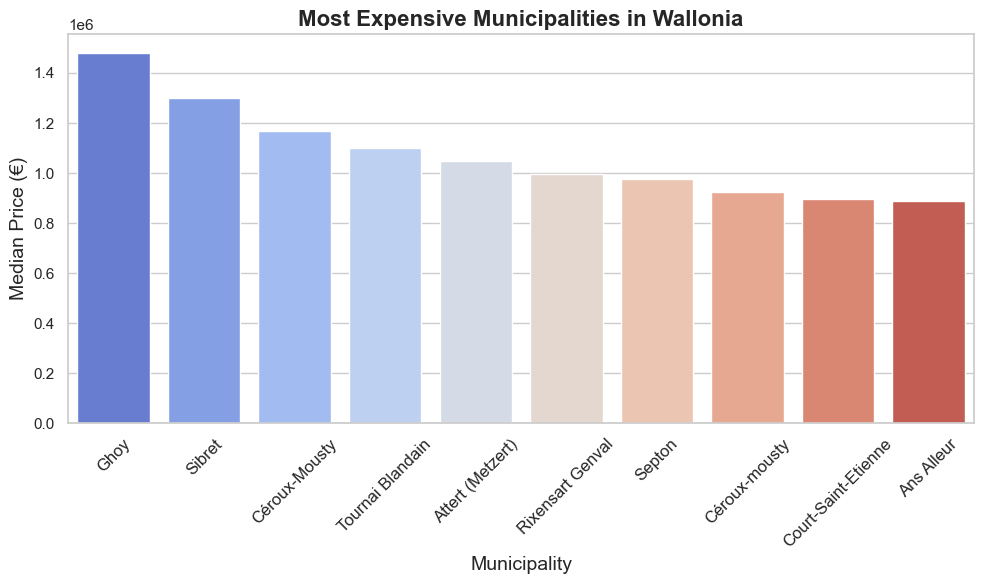

C:\Users\Hashira\AppData\Local\Temp\ipykernel_131652\2413347481.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


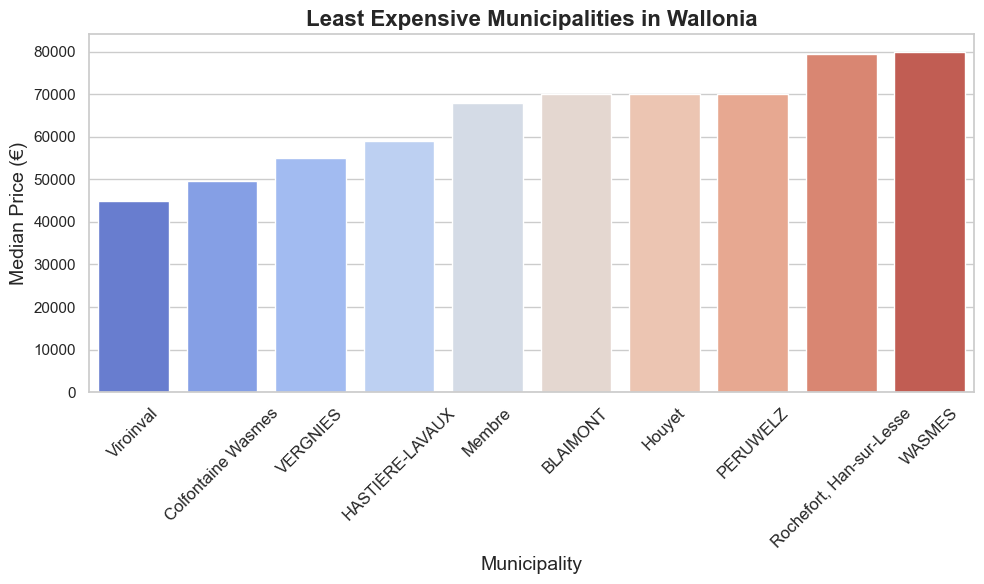

C:\Users\Hashira\AppData\Local\Temp\ipykernel_131652\2413347481.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


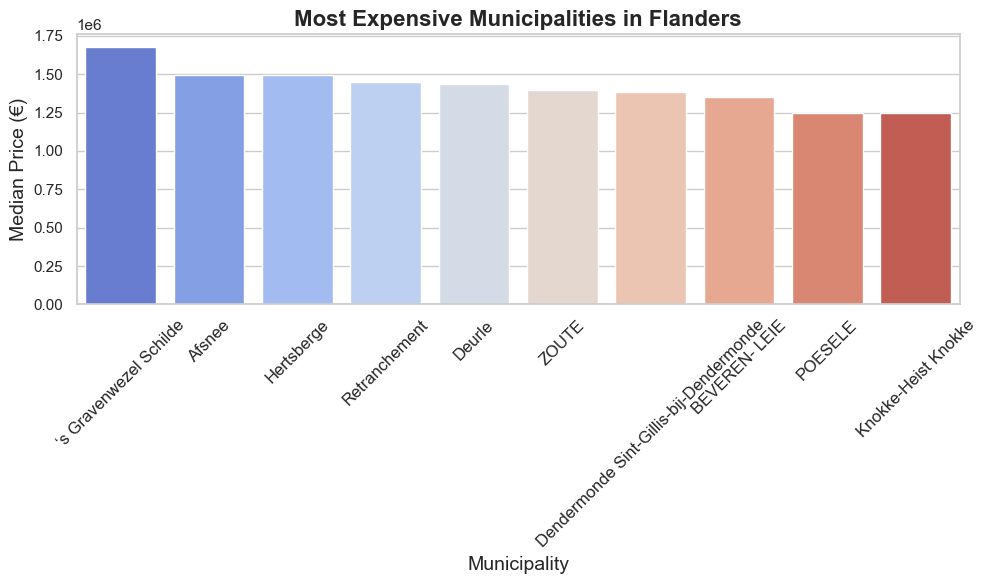

C:\Users\Hashira\AppData\Local\Temp\ipykernel_131652\2413347481.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


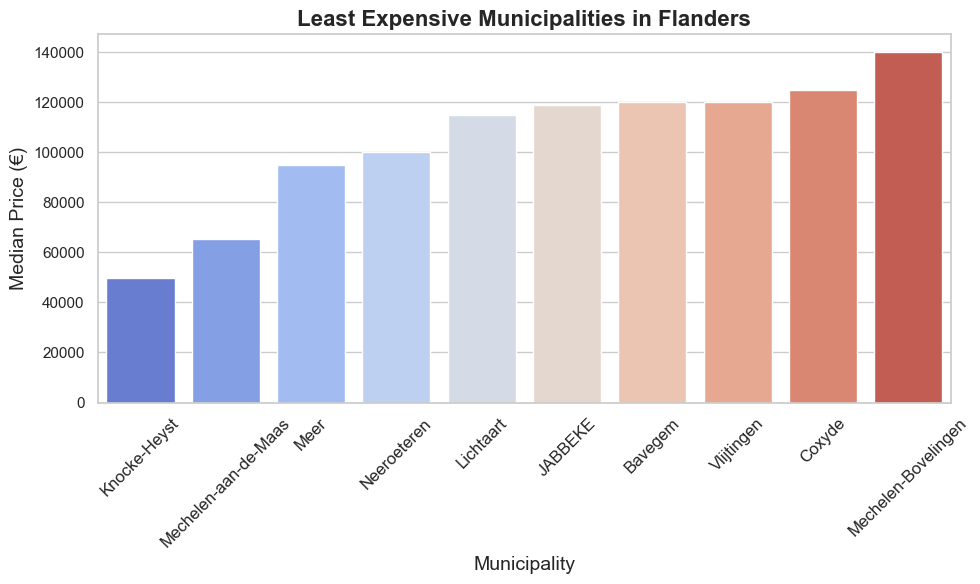

In [49]:
# Most Expensive Municipalities in Wallonia
plt.figure(figsize=(10, 6))
sns.barplot(
    data=most_expensive_wallonia,
    x='locality',
    y='median_price',
    palette='coolwarm'
)
plt.title('Most Expensive Municipalities in Wallonia', fontsize=16, fontweight='bold')
plt.xlabel('Municipality', fontsize=14)
plt.ylabel('Median Price (€)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

# Least Expensive Municipalities in Wallonia
plt.figure(figsize=(10, 6))
sns.barplot(
    data=least_expensive_wallonia,
    x='locality',
    y='median_price',
    palette='coolwarm'
)
plt.title('Least Expensive Municipalities in Wallonia', fontsize=16, fontweight='bold')
plt.xlabel('Municipality', fontsize=14)
plt.ylabel('Median Price (€)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

# Most Expensive Municipalities in Flanders
plt.figure(figsize=(10, 6))
sns.barplot(
    data=most_expensive_flanders,
    x='locality',
    y='median_price',
    palette='coolwarm'
)
plt.title('Most Expensive Municipalities in Flanders', fontsize=16, fontweight='bold')
plt.xlabel('Municipality', fontsize=14)
plt.ylabel('Median Price (€)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

# Least Expensive Municipalities in Flanders
plt.figure(figsize=(10, 6))
sns.barplot(
    data=least_expensive_flanders,
    x='locality',
    y='median_price',
    palette='coolwarm'
)
plt.title('Least Expensive Municipalities in Flanders', fontsize=16, fontweight='bold')
plt.xlabel('Municipality', fontsize=14)
plt.ylabel('Median Price (€)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()